# EDA - Exploratory Data Anlaysis

In [2]:
import pandas as pd

df = pd.read_csv('normalized_data.csv')
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3668-QPYBK,Male,no,No,No,Yes,1,86,3239,Competitor made better offer,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,9237-HQITU,Female,no,No,Yes,Yes,1,67,2701,Moved,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,9305-CDSKC,Female,no,No,Yes,Yes,1,86,5372,Moved,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,7892-POOKP,Female,no,Yes,Yes,Yes,1,84,5003,Moved,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,0280-XJGEX,Male,no,No,Yes,Yes,1,89,5340,Competitor had better devices,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,no,No,No,No,0,45,5306,NaN,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40
7039,6840-RESVB,Male,no,Yes,Yes,No,0,59,2140,NaN,...,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7040,2234-XADUH,Female,no,Yes,Yes,No,0,71,5560,NaN,...,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7041,4801-JZAZL,Female,no,Yes,Yes,No,0,59,2793,NaN,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   ChurnLabel        7043 non-null   object 
 6   ChurnValue        7043 non-null   int64  
 7   ChurnScore        7043 non-null   int64  
 8   CLTV              7043 non-null   int64  
 9   ChurnReason       1869 non-null   object 
 10  Country           7043 non-null   object 
 11  State             7043 non-null   object 
 12  City              7043 non-null   object 
 13  ZipCode           7043 non-null   int64  
 14  Latitude          7043 non-null   float64
 15  Longitude         7043 non-null   float64
 16  TenureMonths      7043 non-null   int64  


In [106]:
df['ChurnReason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [5]:
def report(df):
    cols = []
    data_types = []
    unique_values = []
    n_unique_values = []

    for col in df.columns:
        cols.append(col)
        data_types.append(df[col].dtypes)
        unique_values.append(df[col].unique()[:5])
        n_unique_values.append(df[col].nunique())

    return pd.DataFrame({'Column': cols, 'data_type': data_types, 'unique_values': unique_values, 'n_unique_values': n_unique_values})

In [ ]:
report(df)

,Column,data_type,unique_values,n_unique_values
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Gender,object,"[Male, Female]",2
2,SeniorCitizen,int64,"[0, 1]",2
3,Partner,object,"[No, Yes]",2
4,Dependents,object,"[No, Yes]",2
5,ChurnLabel,object,"[Yes, No]",2
6,ChurnValue,int64,"[1, 0]",2
7,ChurnScore,int64,"[86, 67, 84, 89, 78]",85
8,CLTV,int64,"[3239, 2701, 5372, 5003, 5340]",3438
9,ChurnReason,object,"[Competitor made better offer, Moved, Competit...",20


In [11]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="My Data Profiling Report", explorative=True, minimal=False, dark_mode=True)

# to view the report in a Jupyter notebook
profile.to_notebook_iframe()

AttributeError: module 'numba' has no attribute 'generated_jit'

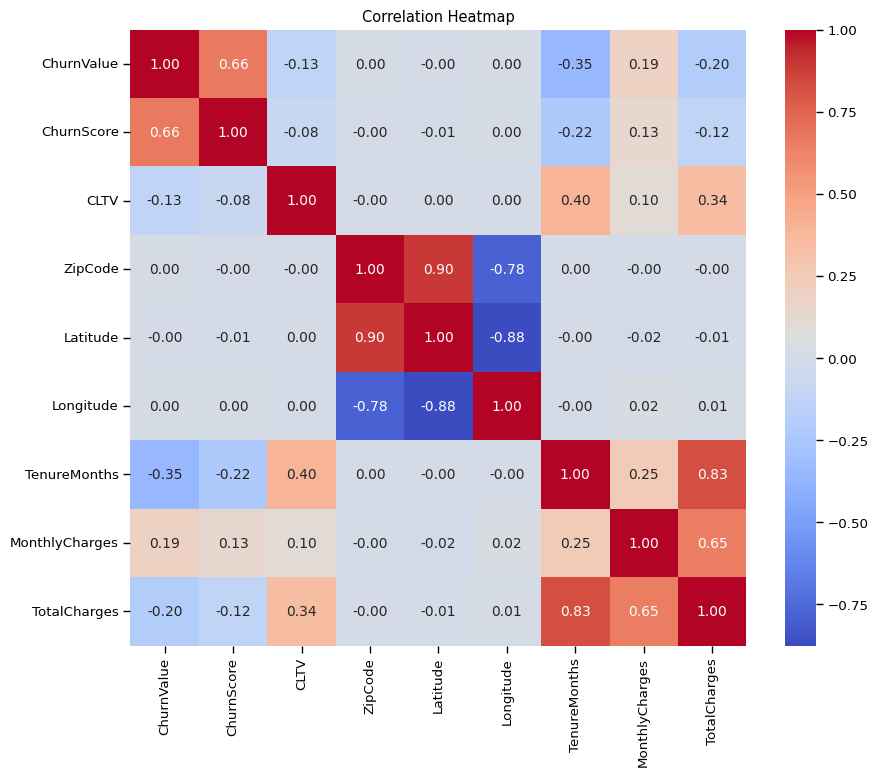

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

corr = df.corr(numeric_only=True)
# Create a heatmap with annotations for correlation values
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, annot_kws={'size': 10})
ax.set_title('Correlation Heatmap')
plt.show()

- Country and State have a constant value, i.e. we are looking at the data of only California (US). So, we drop these two columns as they won't be useful to derive any insights on Churn Rate.
- CustomerID will too not help. So, we drop this too.
- ChurnReason is highly correlated to ChurnLabel (same as ChurnValue) and it has  73.5% missing values. So, we drop it.
- ChurnLabel (target) has close to no correlation with Latitude, Longitude, ZipCode, CLTV so we drop these columns too.
- ChurnValue is the same as ChurnLabel so we drop the categorical former and keep the latter boolean column.
- ChurnScore has a high correlation with ChurnValue so drop this too. 

In [6]:
df1 = df.copy()
target = 'ChurnLabel'

for col in ['Country', 'State', 'CustomerID', 'Latitude','Longitude','ChurnScore', 'CLTV', 'ChurnReason', 'ZipCode']:
  del df1[col]

In [83]:
len(df1.columns)

22

In [7]:
mask = df1.isna()
df1[mask.any(axis=1)] # there are 11 rows with TotalCharges as NaN

,Gender,SeniorCitizen,Partner,Dependents,ChurnLabel,ChurnValue,City,TenureMonths,PhoneService,MultipleLines,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2234,Female,no,Yes,No,No,0,San Bernardino,0,No,No phone service,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
2438,Male,no,No,No,No,0,Independence,0,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2568,Female,no,Yes,No,No,0,San Mateo,0,Yes,No,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
2667,Male,no,Yes,Yes,No,0,Cupertino,0,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
2856,Female,no,Yes,No,No,0,Redcrest,0,No,No phone service,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
4331,Male,no,Yes,Yes,No,0,Los Angeles,0,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
4687,Male,no,Yes,Yes,No,0,Sun City,0,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
5104,Female,no,Yes,Yes,No,0,Ben Lomond,0,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
5719,Male,no,Yes,Yes,No,0,La Verne,0,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
6772,Female,no,Yes,Yes,No,0,Bell,0,Yes,Yes,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN


In [8]:
import math

# since there are NaN values in total charges, let's impute it correctly
def imputeTotalCharges(df):
  for index, row in df.iterrows():
    if(math.isnan(row['TotalCharges'])):
      df.at[index, 'TotalCharges'] = df.at[index, 'MonthlyCharges'] * df.at[index, 'TenureMonths']
      # row['TotalCharges'] = row['MonthlyCharges'] * row['TenureMonths']
  return df

df1 = imputeTotalCharges(df1)

In [35]:
df1[mask.any(axis=1)]

,Gender,SeniorCitizen,Partner,Dependents,ChurnValue,City,TenureMonths,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2234,Female,0,Yes,No,0,San Bernardino,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
2438,Male,0,No,No,0,Independence,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2568,Female,0,Yes,No,0,San Mateo,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0
2667,Male,0,Yes,Yes,0,Cupertino,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
2856,Female,0,Yes,No,0,Redcrest,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
4331,Male,0,Yes,Yes,0,Los Angeles,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0
4687,Male,0,Yes,Yes,0,Sun City,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
5104,Female,0,Yes,Yes,0,Ben Lomond,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
5719,Male,0,Yes,Yes,0,La Verne,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
6772,Female,0,Yes,Yes,0,Bell,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0


In [86]:
df1['TotalCharges'].isna().sum() # now we have no missing values in our df

0

In [9]:
df2 = df1.copy()

In [114]:
df2['ChurnLabel'].value_counts()

No     5174
Yes    1869
Name: ChurnLabel, dtype: int64

In [89]:
df2['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

- There is a high imbalance wrt to ChurnLabel and PhoneService, we may need to stratify it when using train_test_split

## Churn Distribution

In [45]:
import plotly.express as px

In [68]:
dfcl = df2['ChurnLabel'].value_counts().reset_index().rename(columns={'index':'Type'})
dfcl

,Type,ChurnLabel
0,No,5174
1,Yes,1869


In [69]:
fig = px.pie(dfcl, values='ChurnLabel', names='Type', width=400, height=400)
fig.update_traces(textfont_size=18, textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Churn Distribution', title_x=0.5,title_y=0.9, showlegend=False)
fig.show()
del dfcl

- 26.5 % Of Customers Switched To Another Firm.

## Payment Method Distribution

In [91]:
dfp = df2['PaymentMethod'].value_counts().reset_index().rename(columns={'index':'Type'})
dfp

,Type,PaymentMethod
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [92]:
fig = px.pie(dfp, values='PaymentMethod', names='Type', title='Payment Method Distribution')
fig.update_traces(textposition='inside')
fig.show()
del dfp

In [12]:
summary_df = report(df2)
one_hot_cols = summary_df[summary_df.data_type=='object']['Column']
one_hot_cols

0               Gender
1        SeniorCitizen
2              Partner
3           Dependents
4           ChurnLabel
7         PhoneService
8        MultipleLines
9      InternetService
10      OnlineSecurity
11        OnlineBackup
12    DeviceProtection
13         TechSupport
14         StreamingTV
15     StreamingMovies
16            Contract
17    PaperlessBilling
18       PaymentMethod
Name: Column, dtype: object

In [116]:
summary_df

,Column,data_type,unique_values,n_unique_values
0,Gender,object,"[Male, Female]",2
1,SeniorCitizen,object,"[no, yes]",2
2,Partner,object,"[No, Yes]",2
3,Dependents,object,"[No, Yes]",2
4,ChurnLabel,object,"[Yes, No]",2
5,ChurnValue,int64,"[1, 0]",2
6,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
7,TenureMonths,int64,"[2, 8, 28, 49, 10]",73
8,PhoneService,object,"[Yes, No]",2
9,MultipleLines,object,"[No, Yes, No phone service]",3


## Categorical features against Target

### Working out the bar chart function

In [94]:
tdf = df2.groupby(['PaymentMethod', 'ChurnLabel']).size().reset_index().rename(columns={0:'Type'})
tdf

,PaymentMethod,ChurnLabel,Type
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


In [95]:
vcdf = df2['PaymentMethod'].value_counts().reset_index().rename(columns={'index':'Type'})
vcdf

,Type,PaymentMethod
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [96]:
[df['Type'] for idx,df in vcdf.iterrows()]

['Electronic check',
 'Mailed check',
 'Bank transfer (automatic)',
 'Credit card (automatic)']

In [97]:
# [df['Payment Method'] for idx,df in vcdf.iterrows()]
[df[1] for idx,df in vcdf.iterrows()]

[2365, 1612, 1544, 1522]

In [98]:
del tdf,vcdf

### Defining bar chart function

In [117]:
# Defining string formatting for graph annotation
# Numeric section :  a comma and space are appended after all but the last two numbers in the list, space and & are appended after second to last num
def num_format(list_instance):
    formatted_str = ''
    for index,num in enumerate(list_instance):
        if index < len(list_instance)-2: formatted_str=formatted_str+f'{num}%, '
        elif index == len(list_instance)-2: formatted_str=formatted_str+f'{num}% & '
        else: formatted_str=formatted_str+f'{num}%'
    return formatted_str

# Categorical section
def str_format(list_instance):
    formatted_str = ''
    for index, cat in enumerate(list_instance):
        if index < len(list_instance)-2: formatted_str=formatted_str+f'{cat}, '
        elif index == len(list_instance)-2: formatted_str=formatted_str+f'{cat} & '
        else: formatted_str=formatted_str+f'{cat}'
    return formatted_str

def bar(cat_feature,df=df2):

    # Groupby the categorical feature
    temp_df = df.groupby([cat_feature, 'ChurnValue']).size().reset_index().rename(columns={0:'Count'})

    # Calculate the value counts of each distribution and it's corresponding Percentages
    cat_value_counts_df = df[cat_feature].value_counts().reset_index().rename(columns={'index':'Type'})
    categories = [df['Type'] for idx,df in cat_value_counts_df.iterrows()]

    # Calculate the value counts of each distribution and it's corresponding Percentages
    type_num_list = [df[1] for idx,df in cat_value_counts_df.iterrows()]
    div_list = [element / sum(type_num_list) for element in type_num_list]
    type_percentage = [round(element * 100,1) for element in div_list]

    # Running the formatting functions
    num_str = num_format(type_percentage)
    cat_str = str_format(categories)

    # Setting graph framework
    fig = px.bar(temp_df, x=cat_feature, y='Count', color='ChurnValue', title=f'Churn rate by {cat_feature}', barmode="group")
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are {num_str} percentage respectively.',
                showarrow=False,
                xref='paper', yref='paper', x=1.2, y=1.2)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.to_html()

In [ ]:
# bar('Device Protection')

### Bar Plots (Cat Vs. Target)

In [118]:
for cat_col in one_hot_cols:
  bar(cat_col)

Summary:
- No city had a high churn rate (we might as well drop this City column).
- Both Genders Behaved In Similar Fashion When It Came To Migrating To Another Service Provider/Firm.
- Most Of The Senior Citizens Churn.
- About 75% Of Customer With Month-To-Month Contract Opted To Move Out As Compared To 13% Of Customers With One Year Contract And 3% With Two Year Contract.
- Major Customers Who Moved Out Had An Electronic Check As Payment Method On File. Customers Who Opted For Credit-Card Automatic Transfer or Bank Automatic Transfer or Mailed Check As Payment Method Were Less Likely To Move Out.
- Customers With Paperless Billing Are Most Likely To Churn.
- Customers with no internet services were less likely to churn.
- Streaming Movies or TV made no difference in the Churn rate. They would churn irrespective of this status.
- Customers which were offered no tech support or did not consult the tech support were highly likely to churn.
- 66% of the Customers with no online backup switched whereas only 27% of those who did had a backup.
- Most of those had no online security.
- Those customers that had fibre optic internet services were more likely to churn.



In [10]:
df2.drop(columns=['City'],inplace=True)

## Numerical features against Target

In [13]:
num_cols = summary_df[(summary_df.data_type=='int64') | (summary_df.data_type=='float64')].Column
num_cols

5         ChurnValue
6       TenureMonths
19    MonthlyCharges
20      TotalCharges
Name: Column, dtype: object

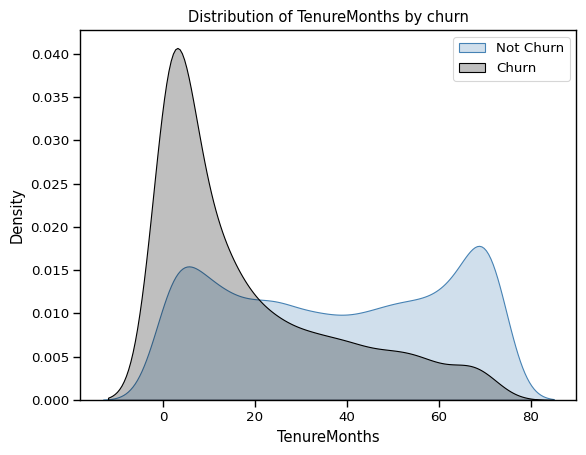

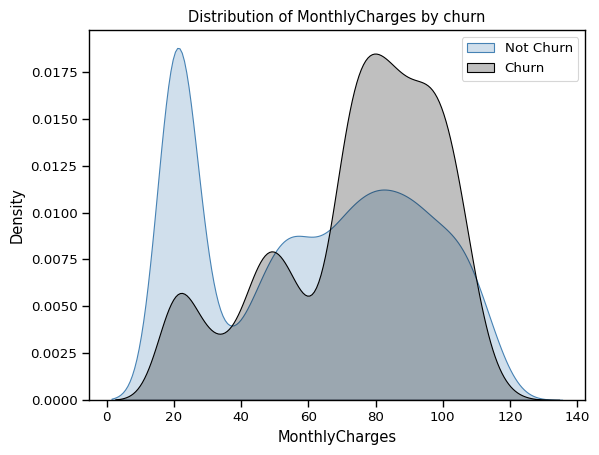

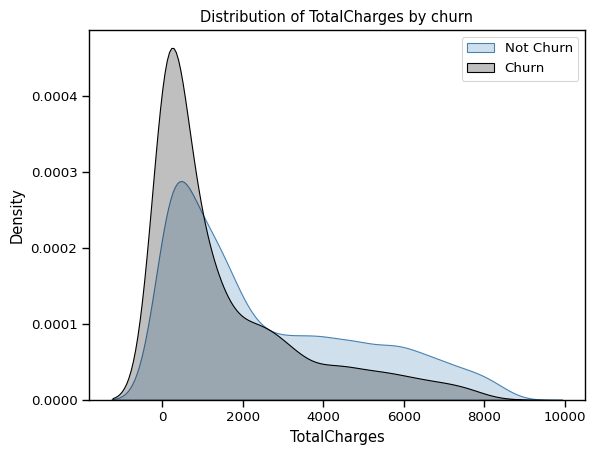

In [122]:
for col in num_cols[1:]:
  sns.set_context("paper",font_scale=1.1)

  ax = sns.kdeplot(df2[col][(df2['ChurnValue'] == 0) ], color="steelblue", fill = True)
  ax = sns.kdeplot(df2[col][(df2['ChurnValue'] == 1) ], ax =ax, color="black", fill= True)

  ax.legend(["Not Churn","Churn"],loc='upper right')
  ax.set_ylabel('Density')
  ax.set_xlabel(col)
  ax.set_title(f'Distribution of {col} by churn')

  plt.show()
  print()

- Since the TotalCharges data is right skewed, we would want to apply log transformation to it. 

# PREPROCESSING PIPELINE:

1. Drop the columns: 'Country', 'State', 'CustomerID', 'Latitude','Longitude','ChurnScore', 'CLTV', 'ChurnReason', 'ZipCode', 'City'
2. Impute missing values from TotalCharges.
3. Apply log transformation to TotalCharges.
4. Standardize all numerical features (TenureMonths, MonthlyCharges, and transformed TotalCharges).
5. One Hot Encode all the categorical columns.

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns_to_drop = ['Country', 'State', 'CustomerID', 'Latitude',
                               'Longitude', 'ChurnScore', 'CLTV', 
                               'ChurnReason', 'ZipCode', 'City']
        self.numeric_features = ['TenureMonths', 'MonthlyCharges', 'TotalCharges']
        self.categorical_features = None  # Will be set during fit
        self.scaler = StandardScaler()
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.encoded_feature_names = None

    def _impute_total_charges(self, X):
        X_ = X.copy()
        for index, row in X_.iterrows():
            if math.isnan(row['TotalCharges']):
                X_.at[index, 'TotalCharges'] = (
                    X_.at[index, 'MonthlyCharges'] * X_.at[index, 'TenureMonths']
                )
        return X_

    def fit(self, X, y=None):
        # Set categorical features (excluding target)
        self.categorical_features = [col for col in X.select_dtypes(include=['object']).columns 
                                   if col not in self.columns_to_drop + ['ChurnLabel']]
        
        X_ = X.copy()
        X_ = self._impute_total_charges(X_)
        X_ = X_.drop(columns=self.columns_to_drop, errors='ignore')
        X_['TotalCharges'] = np.log1p(X_['TotalCharges'])
        
        self.scaler.fit(X_[self.numeric_features])
        self.encoder.fit(X_[self.categorical_features])
        
        self.encoded_feature_names = []
        for i, feature in enumerate(self.categorical_features):
            feature_categories = self.encoder.categories_[i]
            self.encoded_feature_names.extend([f"{feature}_{cat}" for cat in feature_categories])
        
        return self

    def transform(self, X):
        X_ = X.copy()
        X_ = self._impute_total_charges(X_)
        X_ = X_.drop(columns=self.columns_to_drop, errors='ignore')
        X_['TotalCharges'] = np.log1p(X_['TotalCharges'])
        
        X_scaled = pd.DataFrame(
            self.scaler.transform(X_[self.numeric_features]),
            columns=self.numeric_features,
            index=X_.index
        )
        
        X_encoded = pd.DataFrame(
            self.encoder.transform(X_[self.categorical_features]),
            columns=self.encoded_feature_names,
            index=X_.index
        )
        
        return pd.concat([X_scaled, X_encoded], axis=1)

# PCA ANALYSIS

In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mlflow

def perform_pca_analysis(X_train, X_test, n_components=None, mlflow_logging=True):
    """
    Performs PCA analysis, creates scree plot, and logs results to MLflow
    """
    # Initialize PCA
    if n_components is None:
        n_components = min(X_train.shape[1], X_train.shape[0])
    
    pca = PCA(n_components=n_components)
    
    # Fit and transform training data
    X_train_pca = pca.fit_transform(X_train)
    
    # Transform test data
    X_test_pca = pca.transform(X_test)
    
    # Calculate explained variance ratio cumulative sum
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    # Create scree plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot individual explained variance ratios
    ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_ * 100)
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio (%)')
    ax1.set_title('Scree Plot')
    
    # Plot cumulative explained variance ratio
    ax2.plot(range(1, len(cumsum) + 1), cumsum * 100)
    ax2.axhline(y=95, color='r', linestyle='--', label='90% threshold')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Cumulative Explained Variance Ratio (%)')
    ax2.set_title('Cumulative Explained Variance')
    ax2.legend()
    
    plt.tight_layout()
        
    return pca, X_train_pca, X_test_pca, fig

def get_optimal_components(pca_results, variance_threshold=0.95):
    """
    Returns the number of components needed to explain variance_threshold of the variance
    """
    cumsum = np.cumsum(pca_results.explained_variance_ratio_)
    n_components = np.argmax(cumsum >= variance_threshold) + 1
    return n_components

def run_pca_workflow(X_train, X_test):
    """
    Runs the complete PCA workflow with MLflow logging
    """
    with mlflow.start_run(run_name="pca_analysis"):
        # Perform initial PCA analysis
        pca, X_train_pca, X_test_pca, fig = perform_pca_analysis(
            X_train, X_test, mlflow_logging=True
        )
        
        # Get optimal number of components for 95% variance
        n_optimal = get_optimal_components(pca, variance_threshold=0.90)
        print(f"Number of components needed for 90% variance: {n_optimal}")
        
        # If you want to use the optimal number of components
        if n_optimal < X_train.shape[1]:
            pca_optimal = PCA(n_components=n_optimal)
            X_train_pca_optimal = pca_optimal.fit_transform(X_train)
            X_test_pca_optimal = pca_optimal.transform(X_test)
            
            # Convert to DataFrame with component names
            columns = [f"PC{i+1}" for i in range(n_optimal)]
            X_train_pca_df = pd.DataFrame(X_train_pca_optimal, columns=columns, index=X_train.index)
            X_test_pca_df = pd.DataFrame(X_test_pca_optimal, columns=columns, index=X_test.index)
            
            # Log feature importance
            feature_importance = pd.DataFrame(
                pca_optimal.components_.T,
                columns=columns,
                index=X_train.columns
            )
            
            mlflow.log_params({
                "n_components_selected": n_optimal,
                "variance_explained_selected": np.sum(pca_optimal.explained_variance_ratio_)
            })
            
            return X_train_pca_df, X_test_pca_df, feature_importance
        
        return X_train_pca, X_test_pca, None

In [5]:
X = df.drop('ChurnLabel', axis=1)
y = df['ChurnLabel']

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode target variable ('No' -> 0, 'Yes' -> 1)
y_encoded = le.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mlflow

def perform_pca_analysis(X_train, X_test, n_components=None, mlflow_logging=True):
    """
    Performs PCA analysis, creates scree plot, and logs results to MLflow
    """
    # Initialize PCA
    if n_components is None:
        n_components = min(X_train.shape[1], X_train.shape[0])
    
    pca = PCA(n_components=n_components)
    
    # Fit and transform training data
    X_train_pca = pca.fit_transform(X_train)
    
    # Transform test data
    X_test_pca = pca.transform(X_test)
    
    # Calculate explained variance ratio cumulative sum
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    # Create scree plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot individual explained variance ratios
    ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_ * 100)
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio (%)')
    ax1.set_title('Scree Plot')
    
    # Plot cumulative explained variance ratio
    ax2.plot(range(1, len(cumsum) + 1), cumsum * 100)
    ax2.axhline(y=90, color='r', linestyle='--', label='90% threshold')  # Updated to 90% threshold
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Cumulative Explained Variance Ratio (%)')
    ax2.set_title('Cumulative Explained Variance')
    ax2.legend()
    
    plt.tight_layout()
        
    return pca, X_train_pca, X_test_pca, fig

def get_optimal_components(pca_results, variance_threshold=0.90):
    """
    Returns the number of components needed to explain variance_threshold of the variance
    """
    cumsum = np.cumsum(pca_results.explained_variance_ratio_)
    n_components = np.argmax(cumsum >= variance_threshold) + 1  # +1 to include the component that meets the threshold
    return n_components

def run_pca_workflow(X_train, X_test):
    """
    Runs the complete PCA workflow with MLflow logging
    """
    with mlflow.start_run(run_name="pca_analysis"):
        # Perform initial PCA analysis
        pca, X_train_pca, X_test_pca, fig = perform_pca_analysis(
            X_train, X_test, mlflow_logging=True
        )
        
        # Get optimal number of components for 90% variance
        n_optimal = get_optimal_components(pca, variance_threshold=0.90)
        print(f"Number of components needed for 90% variance: {n_optimal}")
        
        # If you want to use the optimal number of components
        if n_optimal < X_train.shape[1]:
            pca_optimal = PCA(n_components=n_optimal)
            X_train_pca_optimal = pca_optimal.fit_transform(X_train)
            X_test_pca_optimal = pca_optimal.transform(X_test)
            
            # Convert to DataFrame with component names
            columns = [f"PC{i+1}" for i in range(n_optimal)]
            X_train_pca_df = pd.DataFrame(X_train_pca_optimal, columns=columns, index=X_train.index)
            X_test_pca_df = pd.DataFrame(X_test_pca_optimal, columns=columns, index=X_test.index)
            
            # Log feature importance
            feature_importance = pd.DataFrame(
                pca_optimal.components_.T,
                columns=columns,
                index=X_train.columns
            )
            
            mlflow.log_params({
                "n_components_selected": n_optimal,
                "variance_explained_selected": np.sum(pca_optimal.explained_variance_ratio_)
            })
            
            return X_train_pca_df, X_test_pca_df, n_optimal, feature_importance
        
        return X_train_pca, X_test_pca, None

Number of components needed for 90% variance: 16


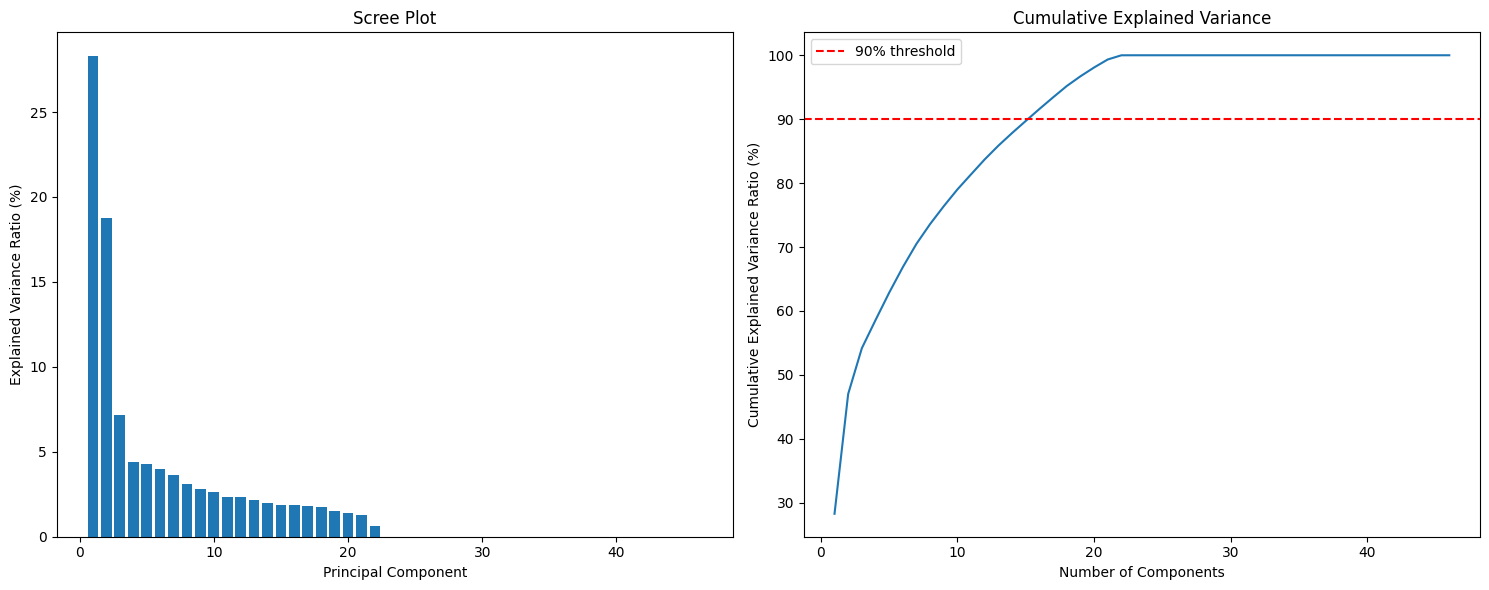

In [22]:
import math

# First preprocess your data
preprocessor = CustomPreprocessor()
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Then run PCA workflow
X_train_pca, X_test_pca, n_optimal, feature_importance = run_pca_workflow(
    X_train_preprocessed, X_test_preprocessed
)

# FEATURE SELECTION

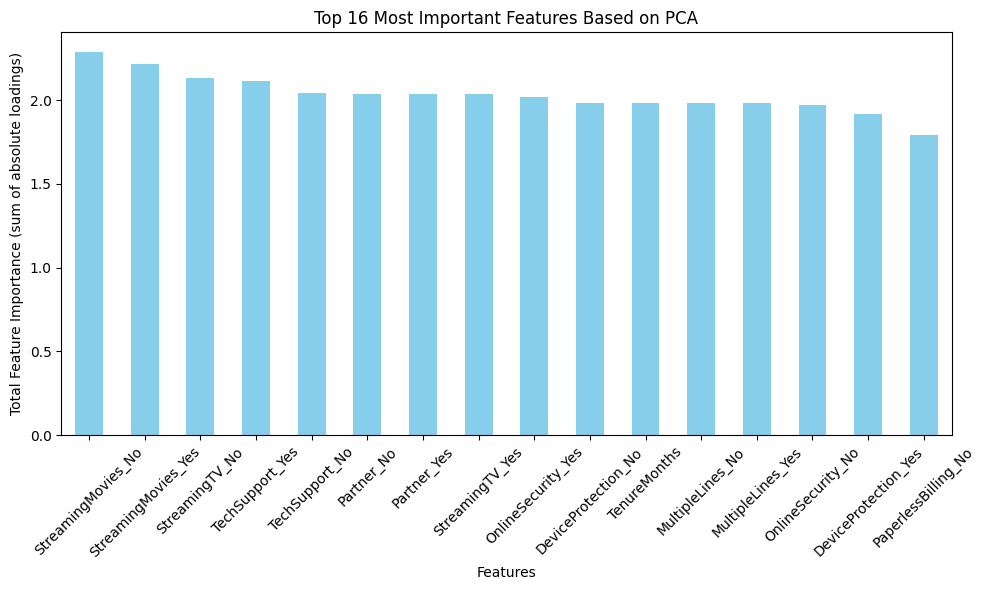

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_feature_importance(feature_importance, top_n=10):
    """
    Plots the feature importance for the first few principal components.
    :param feature_importance: DataFrame of PCA components (loadings)
    :param top_n: Number of top features to plot (default: 10)
    """
    # Compute the absolute value of the components to determine feature importance
    feature_importance_abs = feature_importance.abs()

    # Sum the absolute values across components (to get total importance)
    feature_importance_sum = feature_importance_abs.sum(axis=1)

    # Sort by total importance (highest first)
    feature_importance_sorted = feature_importance_sum.sort_values(ascending=False)

    # Select the top_n most important features
    top_features = feature_importance_sorted.head(top_n)

    # Plot the top features
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='bar', color='skyblue')
    plt.title(f"Top {top_n} Most Important Features Based on PCA")
    plt.xlabel("Features")
    plt.ylabel("Total Feature Importance (sum of absolute loadings)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# After running the PCA workflow and obtaining feature importance
if feature_importance is not None:
    plot_feature_importance(feature_importance, n_optimal)

- Above are features that can be selected to capture 90% variance in the data and get predictions.

## FEATURE SELECTION USING RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your original DataFrame and 'ChurnLabel' is the target column
X = df.drop('ChurnLabel', axis=1)
y = df['ChurnLabel']

# Label encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Apply Custom Preprocessing
preprocessor = CustomPreprocessor()
X_preprocessed = preprocessor.fit_transform(X)

# Check that the shape of preprocessed data matches expectations
print(f"Original feature shape: {X.shape}")
print(f"Preprocessed feature shape: {X_preprocessed.shape}")

# Train a RandomForest model to get feature importance
model = RandomForestClassifier()
model.fit(X_preprocessed, y_encoded)

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for easier understanding of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_preprocessed.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature selection
threshold = 0.02
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

# Display important features
print(important_features)


Original feature shape: (7043, 30)
Preprocessed feature shape: (7043, 46)
                           Feature  Importance
2                     TotalCharges    0.160023
1                   MonthlyCharges    0.136326
0                     TenureMonths    0.135156
37         Contract_Month-to-month    0.048923
44  PaymentMethod_Electronic check    0.031305
19               OnlineSecurity_No    0.026813
17     InternetService_Fiber optic    0.026245
28                  TechSupport_No    0.024340
9                    Dependents_No    0.022650


# FEATURE SELECTION WITH CORRELATION THRESHOLD

In [36]:
import numpy as np

def correlation_threshold(X, threshold=0.9):
    """
    Remove features that have a correlation higher than the given threshold.
    
    Parameters:
    - X: The feature matrix (pandas DataFrame).
    - threshold: The correlation threshold. Default is 0.9.
    
    Returns:
    - X_selected: The feature matrix with highly correlated features removed.
    """
    # Calculate the correlation matrix
    corr_matrix = X.corr().abs()
    
    # Create a boolean mask for features with correlation greater than the threshold
    upper_triangle = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    
    # Get columns to drop
    to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]
    
    # Drop the correlated columns
    X_selected = X.drop(columns=to_drop)
    
    return X_selected

# Apply the correlation threshold to the preprocessed data
X_selected = correlation_threshold(X_preprocessed)

# Print the remaining features
print("Remaining features after correlation thresholding:")
print(X_selected.columns)


Remaining features after correlation thresholding:
Index([], dtype='object')


# FEATURE SELECTION WITH VARIANCE THRESHOLD

In [38]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold(X, threshold=0.1):
    """
    Remove features with variance below the given threshold.
    
    Parameters:
    - X: The feature matrix (pandas DataFrame).
    - threshold: The variance threshold. Features with variance lower than this value will be removed.
    
    Returns:
    - X_selected: The feature matrix with features having low variance removed.
    """
    # Initialize the VarianceThreshold
    selector = VarianceThreshold(threshold=threshold)
    
    # Apply the variance threshold
    X_selected = selector.fit_transform(X)
    
    # Get the remaining feature names
    selected_columns = X.columns[selector.get_support()]
    
    # Convert the result to a DataFrame with the selected columns
    X_selected = pd.DataFrame(X_selected, columns=selected_columns, index=X.index)
    
    return X_selected

# Apply Variance Threshold to the preprocessed data
X_selected = variance_threshold(X_preprocessed)

# Print the remaining features
print("Remaining features after variance thresholding:")
print(X_selected.columns)


Remaining features after variance thresholding:
Index(['TenureMonths', 'MonthlyCharges', 'TotalCharges', 'Gender_Female',
       'Gender_Male', 'SeniorCitizen_no', 'SeniorCitizen_yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Pa